## K-means

### Scipy

In [107]:
import numpy as np
import pandas as pd

In [178]:
np.random.seed(844841)
data  = np.random.random(90).reshape(30,3)
data

array([[0.24831155, 0.97096254, 0.34728096],
       [0.56328018, 0.98027506, 0.45932003],
       [0.41935721, 0.48433467, 0.98068704],
       [0.01959909, 0.95493905, 0.45345757],
       [0.98828078, 0.82507437, 0.63624196],
       [0.86429204, 0.72500955, 0.60588331],
       [0.20195462, 0.09164041, 0.20398052],
       [0.08540474, 0.56416495, 0.7203962 ],
       [0.69254707, 0.1881579 , 0.80201669],
       [0.5369766 , 0.82680745, 0.75348768],
       [0.86086624, 0.26585776, 0.28626075],
       [0.47030025, 0.09846184, 0.64716874],
       [0.66814509, 0.46402028, 0.21350424],
       [0.62445367, 0.44286587, 0.91205334],
       [0.90227398, 0.17758272, 0.18354627],
       [0.29704924, 0.46102245, 0.36501916],
       [0.92944547, 0.94182716, 0.54757142],
       [0.7001803 , 0.28085752, 0.33131349],
       [0.56005616, 0.41396074, 0.46230446],
       [0.15238364, 0.65415315, 0.57909414],
       [0.71020348, 0.03908528, 0.73444876],
       [0.66954986, 0.09582618, 0.97268567],
       [0.

In [179]:
# Escogemos dos centroides al azar

c1 = np.random.choice(len(data))
c2 = np.random.choice(len(data))
clust_centers = np.vstack([data[c1],data[c2]])
clust_centers

array([[0.90227398, 0.17758272, 0.18354627],
       [0.56328018, 0.98027506, 0.45932003]])

In [180]:
# Para obtener información acerca de la pertenencia de los elementos al cluster correspondientes y respecticvas
# distancias
from scipy.cluster.vq import vq
# Para obtener información acerca de los baricentros
from scipy.cluster.vq import kmeans

In [181]:
vq(data,clust_centers)

(array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        1, 1, 1, 0, 0, 1, 1, 1], dtype=int32),
 array([0.33443193, 0.        , 0.73382168, 0.54430268, 0.48581286,
        0.42101   , 0.70586886, 0.68532717, 0.65314843, 0.33283449,
        0.14162397, 0.63859785, 0.37116074, 0.70534977, 0.        ,
        0.5910963 , 0.37860741, 0.27081856, 0.50069326, 0.53808671,
        0.59963837, 0.82679239, 0.4667674 , 0.14109724, 0.62107982,
        0.4818375 , 0.71882483, 0.43117906, 0.67946847, 0.82151724]))

In [182]:
kmeans(data,clust_centers)

(array([[0.61707886, 0.21881664, 0.57918138],
        [0.44930054, 0.78826531, 0.5745284 ]]),
 0.37827040223730707)

In [183]:
# k-means funciona bastante bien si en lugar de darle un punto de partida, simplemente especificamos el número
# de clusters que queremos, verifiquemos esto gráficamente 

kmeans(data,2)

(array([[0.5866229 , 0.24868275, 0.59020158],
        [0.46331551, 0.83681712, 0.55940152]]),
 0.3759216898112021)

In [184]:
clust = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 1]

In [185]:
final = pd.DataFrame(data)
final["cluster"] = clust

In [186]:
final_1 = final[final["cluster"] == 1]

In [187]:
final_0 = final[final["cluster"] == 0]

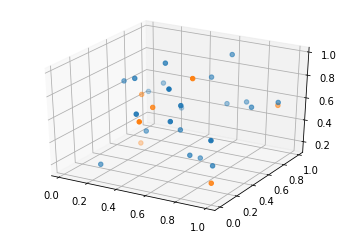

In [188]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(final_1[0],final_1[1],final_1[2])
ax.scatter(final_0[0],final_0[1],final_0[2])

In [189]:
clust_center_2 = kmeans(data,2)[0]

In [190]:
clust_2 = vq(data,clust_center_2)
clust_2

(array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 1], dtype=int32),
 array([0.3304797 , 0.20146816, 0.48578651, 0.47123368, 0.53068906,
        0.41885996, 0.56727302, 0.49302641, 0.24443574, 0.20783548,
        0.40973701, 0.19834953, 0.44149406, 0.37779202, 0.51967236,
        0.42384924, 0.47795836, 0.28452336, 0.21066627, 0.36115447,
        0.28286129, 0.42016198, 0.40581212, 0.28013484, 0.54696428,
        0.44133058, 0.30287007, 0.31632527, 0.20933463, 0.41557123]))

In [191]:
clust_2 = [1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1]
len(clust_2)

30

In [192]:
final["cluster_2"] = clust_2

In [193]:
final.head()

,0,1,2,cluster,cluster_2
0,0.248312,0.970963,0.347281,1,1
1,0.563280,0.980275,0.459320,1,1
2,0.419357,0.484335,0.980687,1,0
3,0.019599,0.954939,0.453458,1,1
4,0.988281,0.825074,0.636242,1,1


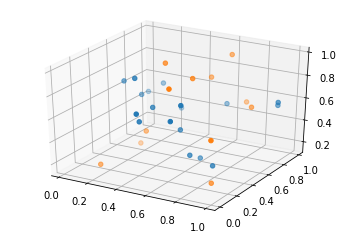

In [194]:
final2_1 = final[final["cluster_2"] == 1]
final2_0 = final[final["cluster_2"] == 0]

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(final2_1[0],final2_1[1],final2_1[2])
ax.scatter(final2_0[0],final2_0[1],final2_0[2])

### Scikit-learn

In [128]:
data = pd.read_csv('https://raw.githubusercontent.com/IsraelObreque/Introduction_to_ML-Python/main/datasets/Mall_Customers/Mall_Customers.csv')

In [129]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [131]:
X = data.iloc[:,[3,4]]

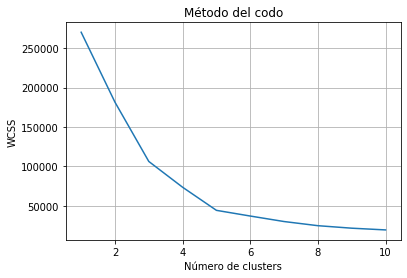

In [132]:
# Número optimo de Cluster

from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init = "k-means++",max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    # kmeans.inertia_ nos entrega la suma de los cuadrados de las diferencias (distancias)
    
plt.plot(range(1,11), wcss)
plt.xlabel("Número de clusters")
plt.ylabel("WCSS")
plt.title("Método del codo")
plt.grid()
plt.show()

In [134]:
kmeans = KMeans(n_clusters= 5, init = "k-means++",max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [135]:
y_kmeans

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [154]:
X["Cluster"]= y_kmeans

/home/israel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [172]:
cl0 = X[X["Cluster"] == 0]
cl1 = X[X["Cluster"] == 1]
cl2 = X[X["Cluster"] == 2]
cl3 = X[X["Cluster"] == 3]
cl4 = X[X["Cluster"] == 4]

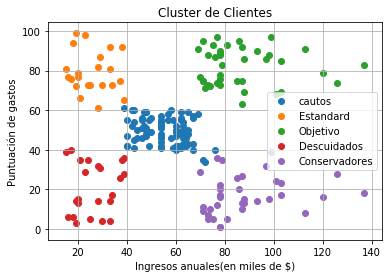

In [177]:
plt.scatter(cl0.iloc[:,0],cl0.iloc[:,1], label = "cautos")
plt.scatter(cl1.iloc[:,0],cl1.iloc[:,1], label = "Estandard")
plt.scatter(cl2.iloc[:,0],cl2.iloc[:,1], label = "Objetivo")
plt.scatter(cl3.iloc[:,0],cl3.iloc[:,1], label = "Descuidados")
plt.scatter(cl4.iloc[:,0],cl4.iloc[:,1], label = "Conservadores")
plt.title("Cluster de Clientes")
plt.xlabel("Ingresos anuales(en miles de $)")
plt.ylabel("Puntuación de gastos")
plt.legend()
plt.grid()
plt.show()